# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [2]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 166MB/s]


Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
csv = pd.read_csv('coins.csv', index_col= 'date')
coins = pd.DataFrame(csv)

coins.index.name = 'index date'
coins.index = pd.to_datetime(coins.index)


Посмотрим что получилось

In [204]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
index date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [205]:
variable = coins['symbol'].value_counts()
len(variable)

#Это не самое правильное решение, зато находчивое! Всего 66 монет!


66

### 2. За какой период данные мы имеем? (0.4 балла)

In [206]:
print(coins.index[0], 'по' , coins.index[37587])
#последний индекс можно посмотреть если навести мышку на coins, но при этом надо отнять 1 

2013-04-28 00:00:00 по 2018-06-06 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [207]:
coins.isna().sum()


price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [208]:
coins['price'].max()
coins[coins['high'] == coins['high'].max()]


,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
index date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

BTC KNC


<Axes: ylabel='market'>

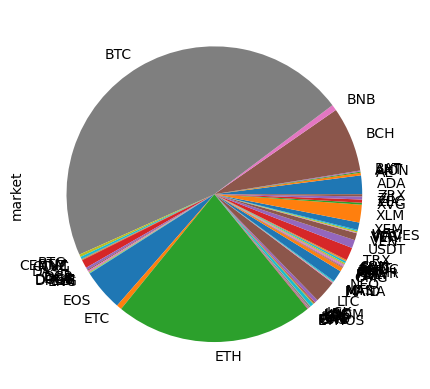

In [261]:
coins = coins.loc['2018-06-06':]
a = (coins.groupby(['symbol'])['market'].max()).idxmax()
b = (coins.groupby(['symbol'])['market'].min()).idxmin()
print(a,b)
#круговая диограмма
coins.groupby(['symbol'])['market'].sum().plot(kind = 'pie', y = 'market')

  


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [210]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins = coins[['open', 'close','low', 'high', 'symbol']].loc[start_date: end_date]
    a = coins.groupby(['symbol']).get_group(symbol).plot(figsize = (16,9))
    a.set_xlabel('Date', color='black', fontsize=12)
    a.set_ylabel('Price', color='black', fontsize=12)
    a.grid(True)
    

Посмотрим, что получилось:

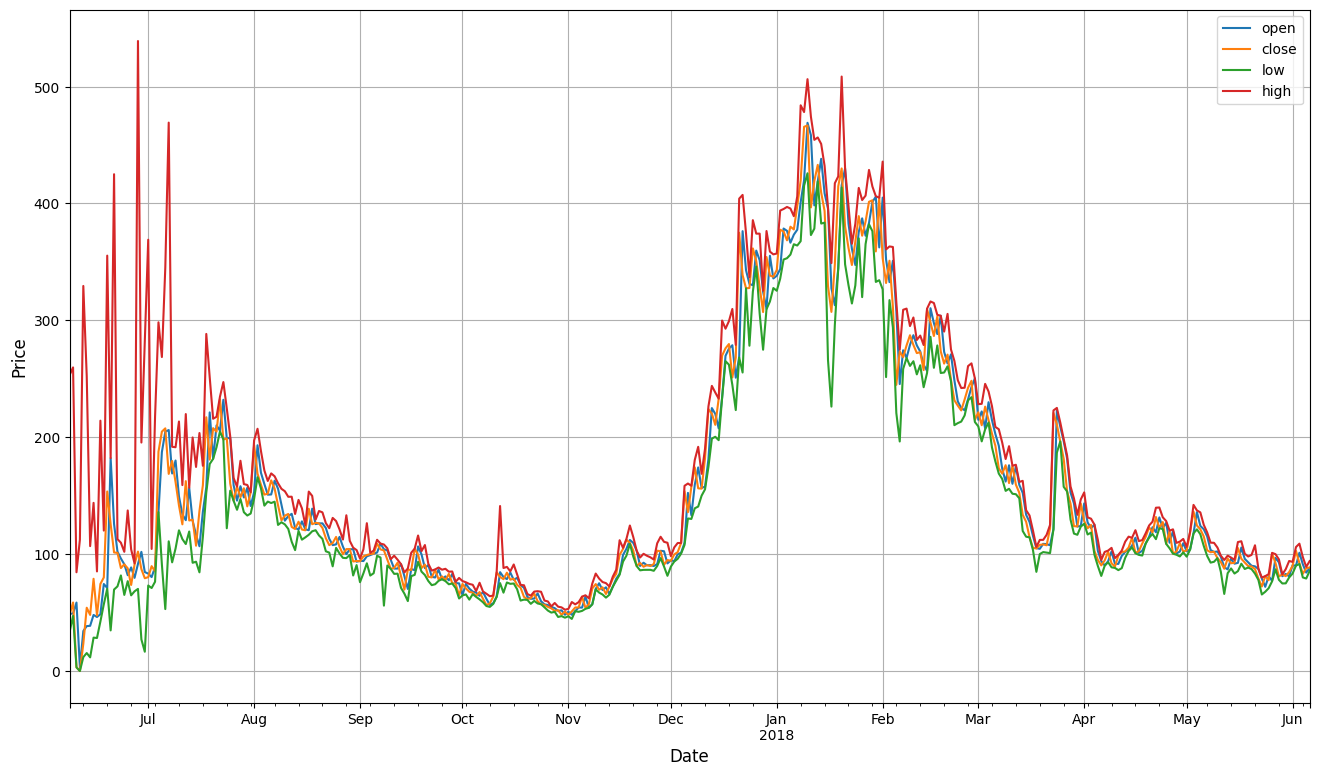

In [211]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [212]:
from numba.misc.special import pndindex
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coins = coins[['symbol', 'high', 'open', 'close']].loc[start_date: end_date]
    max_coin = coins.groupby('symbol')['high'].get_group(symbol)
    max_pr=coins.groupby('symbol')[['close', 'open']].get_group(symbol).max(axis=1)
    pnd = (max_coin/max_pr).max()
    day = (max_coin/max_pr).idxmax()
    return(pnd, day)

In [213]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(1.1428940004366206, Timestamp('2017-11-29 00:00:00'))

Сравните эти значения для разных монет:

In [ ]:
symbol = coins.groupby('symbol')['symbol'].max() #отсортировала по списку все названия монет

for i in symbol:
  a = find_most_severe_pump_and_dump(coins, symbol = i ,start_date='2017-06-01',end_date='2018-06-01')
  
  print(i,a)

ADA (1.2906403940886697, Timestamp('2017-10-01 00:00:00'))
AE (1.7482936279178192, Timestamp('2017-08-06 00:00:00'))
AION (1.3624161073825503, Timestamp('2017-11-24 00:00:00'))
ANT (1.7336683417085428, Timestamp('2017-10-13 00:00:00'))
BAT (1.2342492522991364, Timestamp('2017-06-04 00:00:00'))
BCH (1.783945106058206, Timestamp('2017-11-12 00:00:00'))
BNB (1.176079734219269, Timestamp('2017-12-26 00:00:00'))
BTC (1.1428940004366206, Timestamp('2017-11-29 00:00:00'))
BTG (5.777033492822967, Timestamp('2018-02-21 00:00:00'))
BTM (7.177933491925104, Timestamp('2018-03-13 00:00:00'))
CENNZ (1.1777531885963237, Timestamp('2018-04-07 00:00:00'))
CTXC (1.1428571428571428, Timestamp('2018-04-24 00:00:00'))
CVC (1.726167450721039, Timestamp('2017-12-25 00:00:00'))
DASH (1.2031621370259378, Timestamp('2017-11-29 00:00:00'))
DCR (1.8054444587795122, Timestamp('2018-04-25 00:00:00'))
DGB (1.359942799461642, Timestamp('2017-12-17 00:00:00'))
DOGE (1.2747326203208558, Timestamp('2017-12-17 00:00:00')

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [214]:
def compute_roi(coins, investments, start_date, end_date):
  investments = {'BTC': 1000, 'LTC': 500}
  value_1 = investments['BTC']
  value_2 = investments['LTC']
  invest = value_1 + value_2
  #сколько покупаем за price
  pr_BTC = coins.groupby('symbol').get_group('BTC')['price'][start_date]
  pr_LTC = coins.groupby('symbol').get_group('LTC')['price'][start_date]
  amount_BTC = value_1/pr_BTC
  amount_LTC  = value_2/pr_LTC
  #last price 
  last_BTC = coins.groupby('symbol').get_group('BTC')['price'][end_date]
  last_LTC = coins.groupby('symbol').get_group('LTC')['price'][end_date]
  total_BTC = amount_BTC*last_BTC
  total_LTC = amount_LTC*last_LTC
  total_port = total_BTC + total_LTC
  #final
  ROI = (total_port - invest)/invest
  
  return(ROI)

In [215]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [216]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [217]:
def plot_bollinger_bands(coins, symbol, window, width):
    price = coins.groupby('symbol'). get_group(symbol)['price']
    MA = price.rolling(window ).mean()
    Q = price.rolling(window ).std()
    border_1 = (MA + width*Q)
    border_2 = (MA - width*Q)
    
    
    fig, ax = plt.subplots(figsize=(16, 9), layout='constrained')
    ax.plot(MA,label='MA')
    ax.plot(price,label='Price')
    ax.plot(border_1,label='Upper border', color='violet')
    ax.plot(border_2,label='Lower border', color='violet')
    

    ax.set_xlabel('date') 
    ax.set_ylabel('Price')
    ax.legend()
   

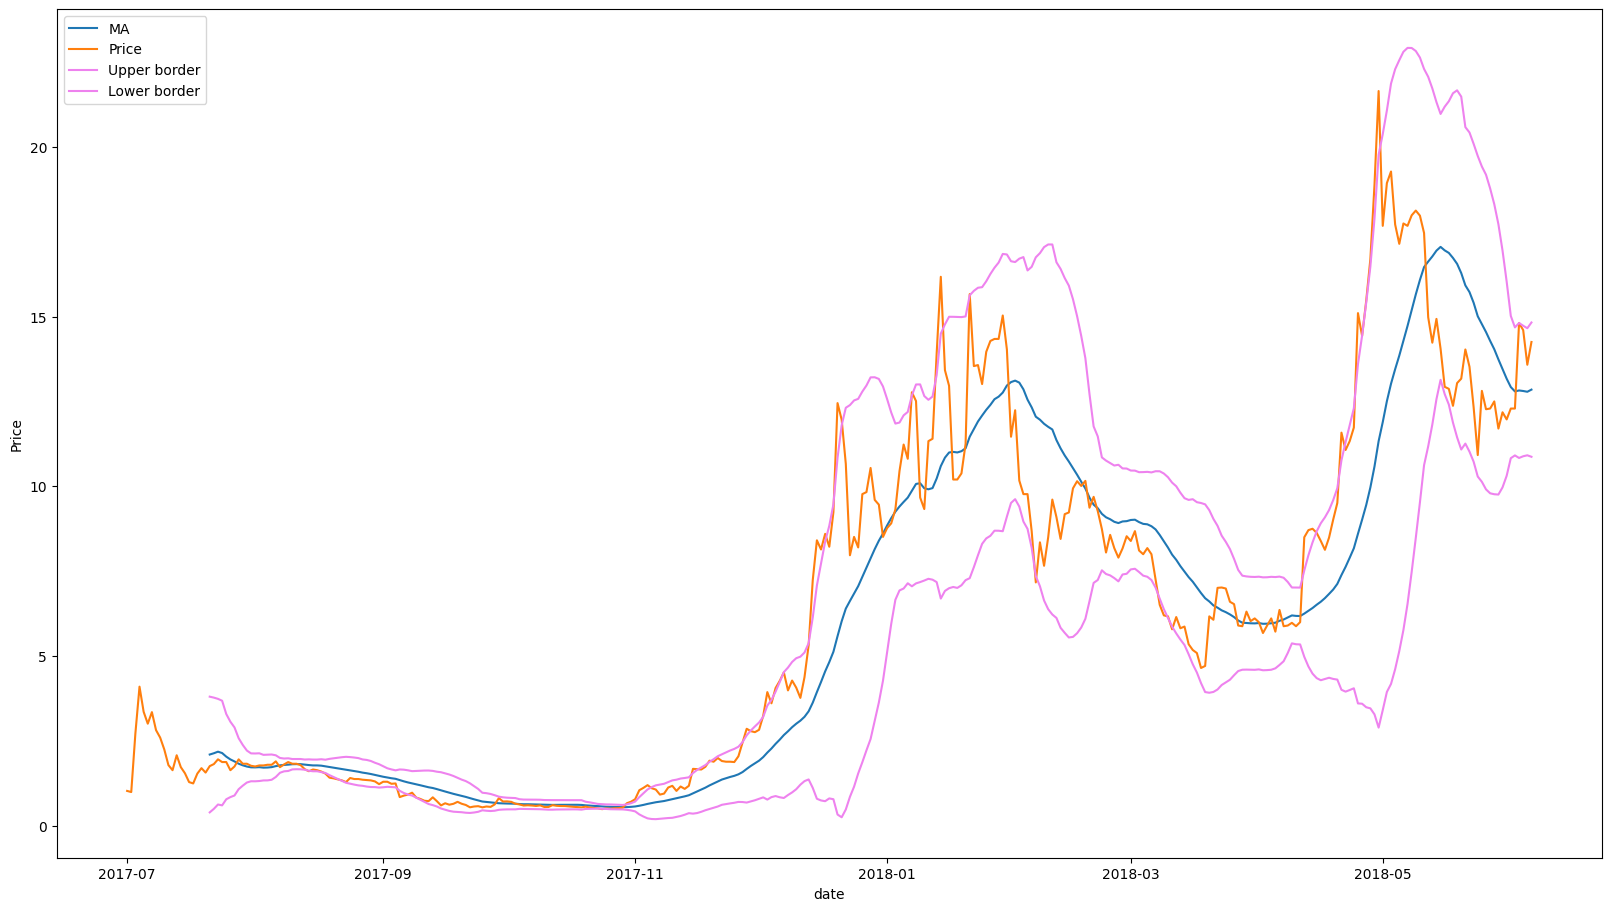

In [218]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Да, в общем и целом выполяются)**


## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [41]:
def plot_coins_capitalizations(coins, symbols, start_date):
    BTC = coins.groupby(['symbol']).get_group('BTC')['market'][start_date:]
    ETH = coins.groupby(['symbol']).get_group('ETH')['market'][start_date:]
    EOS = coins.groupby(['symbol']).get_group('EOS')['market'][start_date:]
    BCH = coins.groupby(['symbol']).get_group('BCH')['market'][start_date:]
    XLM = coins.groupby(['symbol']).get_group('XLM')['market'][start_date:]
    LTC = coins.groupby(['symbol']).get_group('LTC')['market'][start_date:]
    
    #доля капитализации
    coins = coins[start_date:]
    all_cap = coins.pivot_table(values = 'market', index = 'index date', columns='symbol')
    all_cap = all_cap.sum(axis = 1)
    d_btc = BTC.div(all_cap)
    d_eth = ETH.div(all_cap)
    d_eos = EOS.div(all_cap)
    d_bch = BCH.div(all_cap)
    d_xlm = XLM.div(all_cap)
    d_ltc = LTC.div(all_cap)
    
    #Грфик для долей 
    fig_1, ax_1 = plt.subplots(figsize=(7, 5), layout='constrained')
    ax_1.plot(d_btc,label='BTC')
    ax_1.plot(d_eth,label='ETH')
    ax_1.plot(d_eos,label='EOS')
    ax_1.plot(d_bch,label='BCH')
    ax_1.plot(d_xlm,label='XLM')
    ax_1.plot(d_ltc,label='LTC')

    ax_1.set_xlabel('date') 
    ax_1.set_ylabel('Доля')
    ax_1.legend()
    

    #строим график
    fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
    ax.plot(BTC,label='BTC')
    ax.plot(ETH,label='ETH')
    ax.plot(EOS,label='EOS')
    ax.plot(BCH,label='BCH')
    ax.plot(XLM,label='XLM')
    ax.plot(LTC,label='LTC')

    ax.set_xlabel('date') 
    ax.set_ylabel('market cap')
    ax.legend()
    
    
    

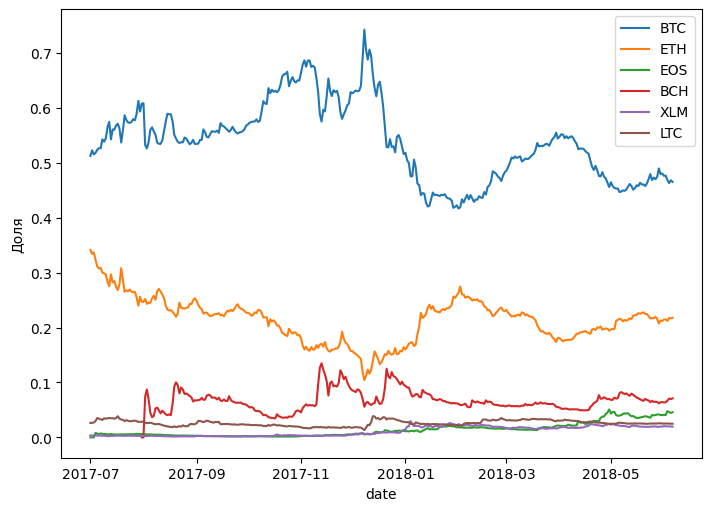

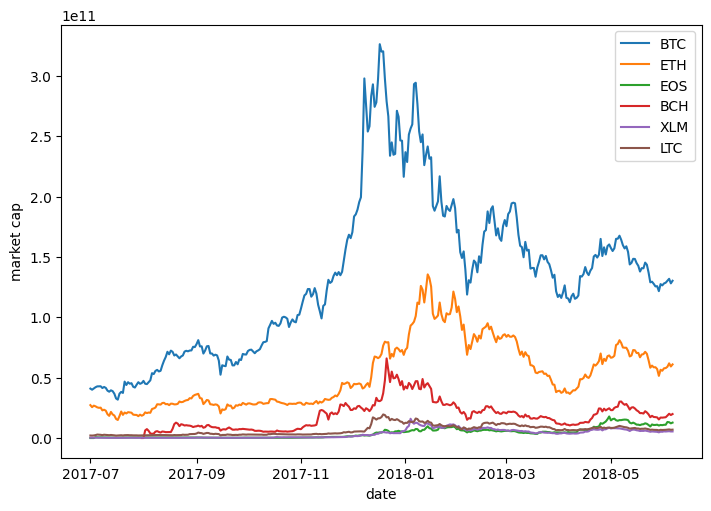

In [42]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Биткойн самая первая успешная монета и скорее всего остальные монеты поддерживаются за счет биткойна. Также я знаю, что практически каждый альткойн с нормальной капитализацией торгуется в паре с биткойном.(Можно зайти на Binance и это заметить)**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [306]:

from pandas.core.ops import methods
def calc_coins_correlations(coins, date, symbols, window, alpha):

    coins = coins[:date]
    all_cap = coins.pivot_table(values = 'market', index = 'index date', columns='symbol')
    all_cap = all_cap.sum(axis = 1)
    
    a = coins[coins['symbol'].isin(symbols)][['market', 'symbol']]
    a = a.pivot_table(index = 'index date', columns= 'symbol', values = 'market')
    
    #доли капитализации
    
    dol = (a.div(all_cap, axis = 0))
    
    #делаем корреляцию 
    corr_matrix = dol.corr()
    
    #среднее сглаженное
    mean_1 = corr_matrix.ewm(alpha, adjust=True).mean()
    df = pd.DataFrame(mean_1)
    return(df)
    
    
    


In [308]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-308-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.14,-0.82,0.45,0.40,0.39,0.84
BCH,0.21,0.93,-0.18,0.07,-0.27,-0.04,0.06
BTC,-0.73,-0.03,0.89,-0.59,-0.86,0.14,-0.63
EOS,0.34,0.03,-0.52,0.86,-0.13,0.19,0.68
ETH,0.40,-0.30,-0.88,0.03,0.90,0.18,0.50
LTC,0.39,-0.10,0.06,0.18,0.24,0.93,0.31
XLM,0.80,-0.02,-0.62,0.75,0.46,0.35,0.94


Довольно интересно ещё взглянуть на 2017-12-27:

In [239]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-239-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.35,-0.43,0.88,-0.45,0.76,0.90
BCH,0.41,0.95,-0.30,0.46,-0.38,0.09,0.35
BTC,-0.36,-0.18,0.88,-0.05,-0.90,0.20,-0.23
EOS,0.77,0.37,-0.01,0.90,-0.30,0.50,0.66
ETH,-0.34,-0.30,-0.87,-0.14,0.88,0.11,0.43
LTC,0.66,-0.00,0.11,0.47,0.14,0.92,0.33
XLM,0.88,0.27,-0.25,0.72,0.39,0.38,0.94


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

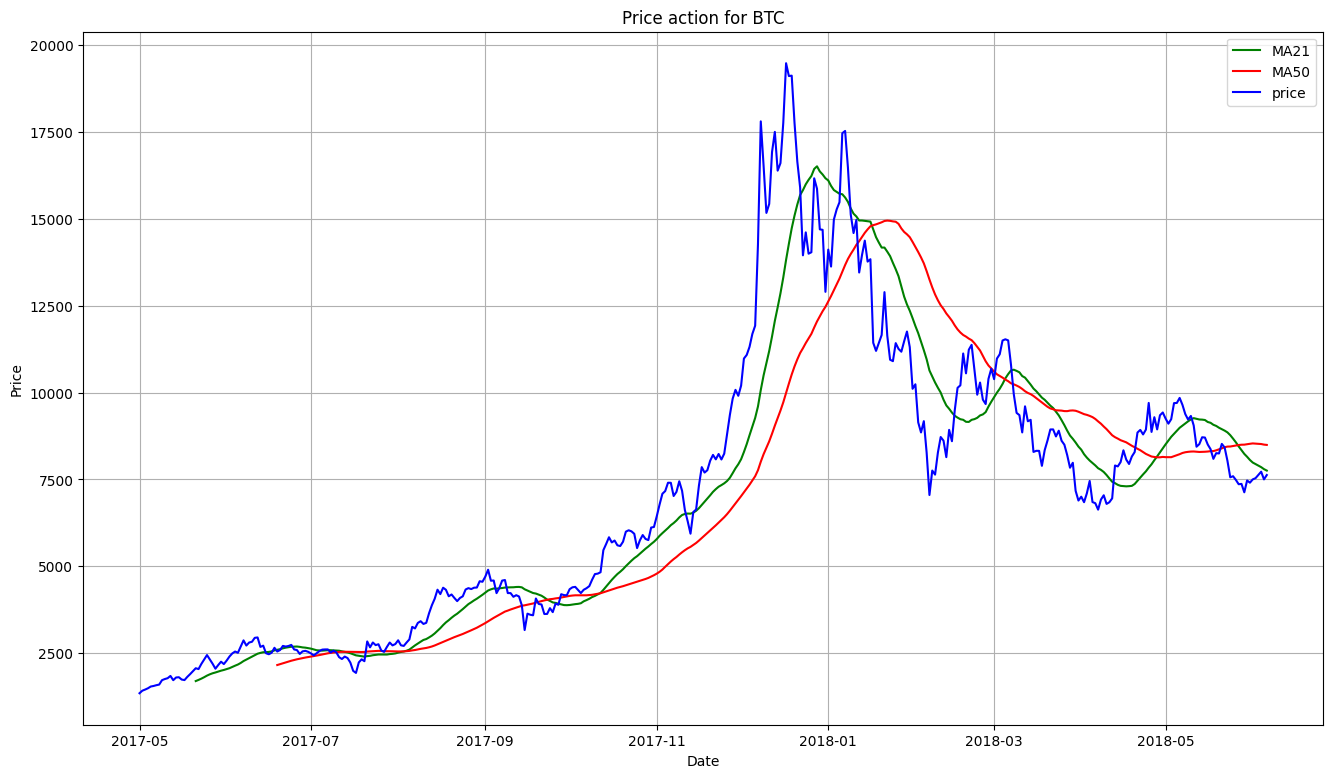

In [240]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [29]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coin = coins[coins['symbol']==symbol][start_date: end_date]
    close = coin['close']
    close_pr = close.shift(1)
    
    lead_mean = close_pr.rolling(window=lead_window).mean()
    lag_mean = close_pr.rolling(window=lag_window).mean()

    #multiplier

    mult = (close/close_pr)
    mult.iloc[0] = 1
    
    # накопления таких multiplier
    
    multipliers = mult.cumprod()
    
    
    #Статистика из прошлого
    ratio = lead_mean/lag_mean
    multip = [1]
    i = 0
    for i in range(len(multipliers)):
      if ratio > (1+ threshold):
        multip.append(multip[-1]*multipliers[i])
      else:
        multip.append(multip[-1])
    
    #Profit
    for i in range(len(multip)):
      reg_strategy = multip[i]/multip[i-1]
    
    hold = multipliers[end_date:]
    
    # грфик цен и скользящих средних
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.plot(lead_mean, color='blue', label='Lead')
    ax.plot(lag_mean, color='red', label='Lag')
    ax.plot(close, color='pink', label='close price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)
    plt.show() 

In [30]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.